## Univariate Linear Regression


In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn; seaborn.set()

from ipywidgets import interact

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### The Dataset

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profitt indicates a loss.

In [2]:
data = np.genfromtxt('ex1data1.txt', delimiter=',')

X = data[:,0] # dataset features
y = data[:,1] # dataset labels

print(data.shape)

(97, 2)


### Visualizing the dataset

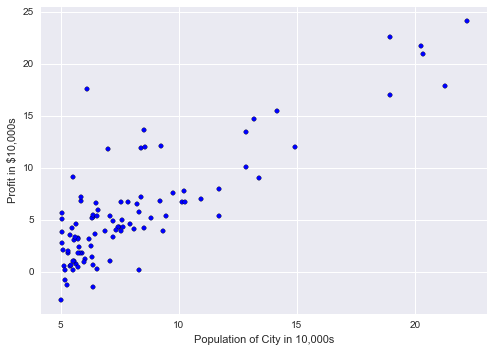

In [3]:
x_label = "Population of City in 10,000s"
y_label = "Profit in $10,000s"

ax = plt.axes()
ax.scatter(X, y);
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.axis('tight');

### Initializing the parameters

We start off by initializing the initial parameters

In [4]:
X = np.c_[np.ones(len(X)), X] # add a column of 1 to feature matrix
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

### Cost function J($\theta$) = $\sum_{n=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2$
Where the hypothesis $h_{\theta}$ is given by the linear model $h_{\theta}(x) = \theta^T x$ = $\theta_{0} + \theta_{1}$

The following piece of code implements the cost function J($\theta$)

In [7]:
def compute_cost(X, y, theta):
    return np.sum((np.dot(X, theta) - y)**2) / (2 * len(X))

compute_cost(X,y,theta)

32.072733877455676

### Gradient descent 

In batch gradient descent each iteration performs the update $\theta_{j} := \theta_{j} - \alpha \sum_{n=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x_{j}^(i)$

In [14]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(X)
    X_trans = np.transpose(X)
    J_history = []
    for i in range(num_iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(X_trans, loss) / len(X)
        theta = theta - alpha * gradient
        J_history.append(cost)
    return theta, J_history

theta, J_history = gradient_descent(X, y, theta, alpha, iterations);

### Visualizing J($\theta$)

The following plots visualizes the evolution of the cost function J($\theta$) for $\theta_0$ from [-10, 10] and $\theta_1$ from [-1, 4].

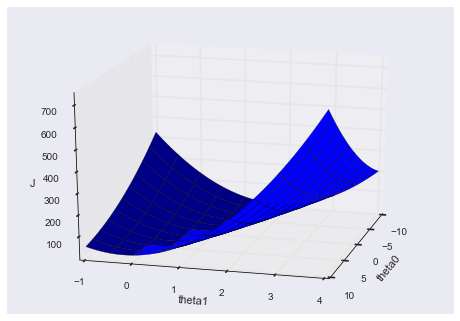

In [15]:
def plot_theta_j(elev=20, azim=40):
    xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-1, 4, 100))
    J_vals = np.zeros(xx.shape)
    
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            J_vals[i, j] = compute_cost(X, y, np.array([xx[i,j], yy[i,j]]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, J_vals);
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.set_zlabel("J")
    ax.axis('tight')
    ax.view_init(elev, azim)

interact(plot_theta_j, elev=[0, 90], azim=[0, 90])

### Plotting the regression line



(4.1631359782757063,
 23.066764021724293,
 -4.0292981225080631,
 25.49559812250806)

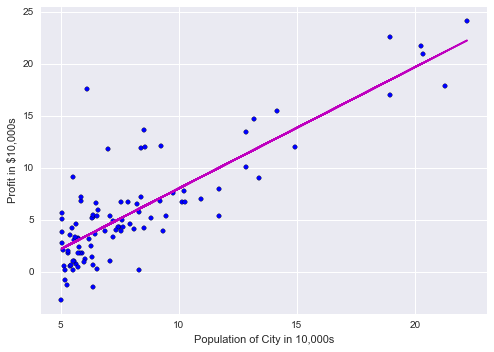

In [16]:
predict = np.dot(X, theta); # predict for all X values

ax = plt.axes()
ax.scatter(X[:,1], y)
ax.plot(X[:,1], predict, color='m');
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.axis('tight')